In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Q1. 
Read data from HoustonCrime.csv, use the OBJECTID as the index. Drop records that have missing values in any of X, Y, Time_Begun, HPD_Division, Premise_Type or Zip_Code. Verify that you should have 8206 records. Convert Zip_Code into a String

In [5]:
Hou_crime=pd.read_csv('HoustonCrime.csv', index_col='OBJECTID')
Hou_crime.head()


,X,Y,Join_Count,TARGET_FID,Join_Count_1,Incident_No,Time_Begun,UCR_No,HPD_Beat,HPD_District,...,Address_Range,Premise_Type,X_Coord,Y_Coord,Zip_Code,Time_Frame,SNB_No,SNB_Name,Council_District,HPD_Division
OBJECTID,,,,,,,,,,,,,,,,,,,,,
3001,-95.181311,29.584536,1,3001,1,12730219,2019-01-29T23:30:00.000Z,3001,12D40,12,...,15600-15699 GULF,Apartment Parking Lot,3181962.324,13779888.61,77598.0,3,80.0,SOUTH BELT / ELLINGTON,E,Clear Lake Division
3002,-95.508806,29.851156,1,3002,1,10474019,2019-01-24T18:40:00.000Z,6074,5F30,5,...,13400-13499 NORTHWEST,Department or Discount St,3075033.142,13873544.17,77040.0,3,4.0,FAIRBANKS / NORTHWEST CROSSING,A,Northwest Division
3003,-95.283720,29.834696,1,3003,1,10480919,2019-01-24T02:00:00.000Z,6141,8C30,8,...,7900-7999 DARLINGTON,Residence or House,3146540.941,13869759.97,77028.0,3,49.0,EAST HOUSTON,B,Northeast Division
3004,-95.602969,29.684419,1,3004,1,10874819,2019-01-25T15:00:00.000Z,6191,19G40,19,...,12600-12699 NEWBROOK,Residence or House,3046957.561,13812059.35,77072.0,3,25.0,ALIEF,F,Westside Division
3005,-95.322855,29.672193,1,3005,1,13095419,2019-01-30T06:00:00.000Z,5021,14D30,14,...,6100-6199 DOULTON,Residence or House,3135997.006,13810305.48,77033.0,3,72.0,SOUTH PARK,D,Southeast Division


In [8]:
Hou_crime.dropna(subset=['X','Y', 'Time_Begun','HPD_Division','Premise_Type','Zip_Code'], inplace=True)
Hou_crime.count()

X                   8206
Y                   8206
Join_Count          8206
TARGET_FID          8206
Join_Count_1        8206
Incident_No         8206
Time_Begun          8206
UCR_No              8206
HPD_Beat            8206
HPD_District        8206
Offense             8206
Address_Range       8206
Premise_Type        8206
X_Coord             8206
Y_Coord             8206
Zip_Code            8206
Time_Frame          8206
SNB_No              8175
SNB_Name            8175
Council_District    8193
HPD_Division        8206
dtype: int64

In [10]:
 
Hou_crime.head()

,X,Y,Join_Count,TARGET_FID,Join_Count_1,Incident_No,Time_Begun,UCR_No,HPD_Beat,HPD_District,...,Address_Range,Premise_Type,X_Coord,Y_Coord,Zip_Code,Time_Frame,SNB_No,SNB_Name,Council_District,HPD_Division
OBJECTID,,,,,,,,,,,,,,,,,,,,,
3001,-95.181311,29.584536,1,3001,1,12730219,2019-01-29T23:30:00.000Z,3001,12D40,12,...,15600-15699 GULF,Apartment Parking Lot,3181962.324,13779888.61,77598,3,80.0,SOUTH BELT / ELLINGTON,E,Clear Lake Division
3002,-95.508806,29.851156,1,3002,1,10474019,2019-01-24T18:40:00.000Z,6074,5F30,5,...,13400-13499 NORTHWEST,Department or Discount St,3075033.142,13873544.17,77040,3,4.0,FAIRBANKS / NORTHWEST CROSSING,A,Northwest Division
3003,-95.283720,29.834696,1,3003,1,10480919,2019-01-24T02:00:00.000Z,6141,8C30,8,...,7900-7999 DARLINGTON,Residence or House,3146540.941,13869759.97,77028,3,49.0,EAST HOUSTON,B,Northeast Division
3004,-95.602969,29.684419,1,3004,1,10874819,2019-01-25T15:00:00.000Z,6191,19G40,19,...,12600-12699 NEWBROOK,Residence or House,3046957.561,13812059.35,77072,3,25.0,ALIEF,F,Westside Division
3005,-95.322855,29.672193,1,3005,1,13095419,2019-01-30T06:00:00.000Z,5021,14D30,14,...,6100-6199 DOULTON,Residence or House,3135997.006,13810305.48,77033,3,72.0,SOUTH PARK,D,Southeast Division


## Q2. 
Create a line chart with a title, markers, X and Y labels, a legend placed at the left bottom, for the numbers of theft cases based on dates


In [14]:
Hou_crime['Time_Begun']=Hou_crime['Time_Begun'].str[:10]
dates =Hou_crime['Time_Begun'].unique()
dates.sort()
dates

array(['2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
       '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
       '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
       '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
       '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
       '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
       '2019-02-14', '2019-02-15', '2019-02-16', '2019-02-17',
       '2019-02-18', '2019-02-19', '2019-02-20'], dtype=object)

In [15]:
#Now we want to sort colum in time_begun and covert it into date time
Hou_crime.sort_values(by='Time_Begun', inplace=True)
from datetime import datetime
Hou_crime['Time_Begun']=[datetime.strptime(x,'%Y-%m-%d')
                        for x in Hou_crime['Time_Begun']]
Hou_crime['Time_Begun'].dtype

dtype('<M8[ns]')

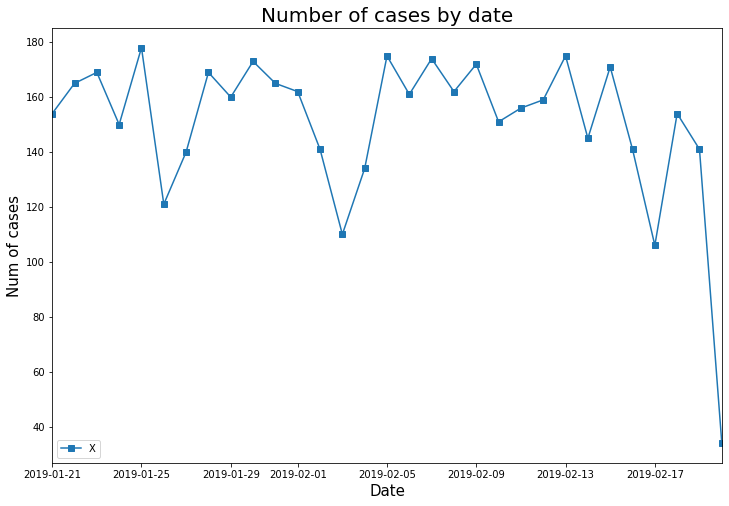

In [24]:
Hou_crime2= Hou_crime[Hou_crime['Offense'] =='Theft']
ax=Hou_crime2.groupby(Hou_crime['Time_Begun'].dt.date).size().plot(figsize=(12,8), marker='s', label='X')
ax.set_xlabel('Date', size=15)
ax.set_ylabel('Num of cases',size =15)
ax.set_title('Number of cases by date', size=20)
ax.legend(loc='lower left')

## Q3. 
Write statements to answer: which HPD_Division has the largest number of crime cases (by all types)?

In [26]:
Hou_crime.pivot_table(['Incident_No'], index='HPD_Division', columns='Offense', aggfunc='count', margins=True)

Incident_No                                   \
Offense                Aggravated Assault Auto Theft Burglary Murder  Rape   
HPD_Division                                                                 
Airport-Hobby Division                1.0        NaN      NaN    NaN   NaN   
Airport-IAH Division                  1.0        4.0      NaN    NaN   NaN   
Central Division                     34.0       71.0    121.0    2.0   3.0   
Clear Lake Division                  27.0       58.0     67.0    2.0   4.0   
Downtown Division                     6.0       14.0      4.0    NaN   2.0   
Eastside Division                    32.0       37.0     41.0    2.0   3.0   
Kingwood Division                     9.0        6.0     19.0    NaN   1.0   
Midwest Division                     31.0       78.0    105.0    NaN   6.0   
North Belt Division                  40.0       59.0     30.0    NaN   4.0   
North Division                       97.0      115.0    111.0    3.0   5.0   
Northeast Division                  114.0       98.0    104.0    1.0   6.0   
Northwest Division                   33.0       46.0     67.0    1.0   2.0   
South Central Division               47.0       39.0     71.0    1.0   7.0   
South Gessner Division               61.0       70.0     58.0    4.0   2.0   
Southeast Division                  100.0       67.0    115.0    2.0   6.0   
Southwest Division                   51.0       50.0     75.0    1.0   2.0   
Westside Division                   106.0       89.0    181.0    1.0   8.0   
All                                 790.0      901.0   1169.0   20.0  61.0   

                                              
Offense                Robbery   Theft   All  
HPD_Division                                  
Airport-Hobby Division     NaN     5.0     6  
Airport-IAH Division       NaN    36.0    41  
Central Division          37.0   773.0  1041  
Clear Lake Division       32.0   236.0   426  
Downtown Division          5.0    83.0   114  
Eastside Division         25.0   109.0   249  
Kingwood Division          2.0    49.0    86  
Midwest Division          46.0   469.0   735  
North Belt Division       31.0   191.0   355  
North Division            54.0   366.0   751  
Northeast Division        58.0   290.0   671  
Northwest Division        34.0   290.0   473  
South Central Division    36.0   313.0   514  
South Gessner Division    60.0   221.0   476  
Southeast Division        63.0   267.0   620  
Southwest Division        29.0   318.0   526  
Westside Division         85.0   652.0  1122  
All                      597.0  4668.0  8206

## Q4. 
Create a BLUE bar chart of burglary cases based on zip code, including a bigger size title, X, Y labels.

Text(0.5, 1.0, 'Numeber of burglary cases by Zip Code')

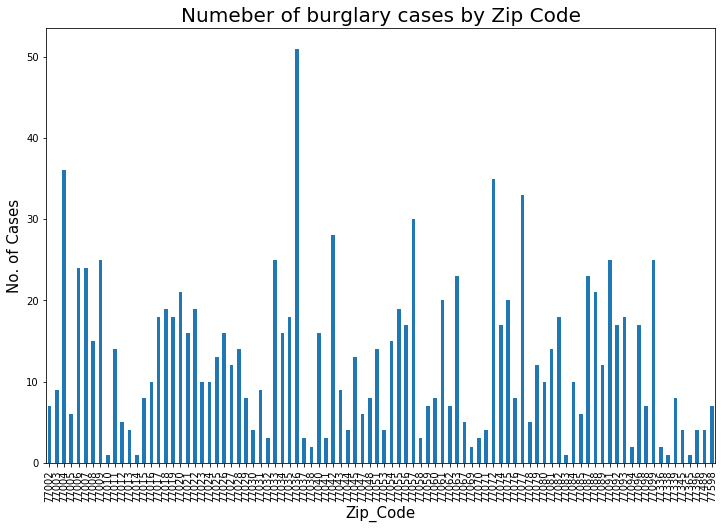

In [29]:
off_burg=Hou_crime[Hou_crime['Offense']=='Burglary']
ax=off_burg.groupby(['Zip_Code']).size()
ax=ax.plot.bar(figsize=(12,8))
ax.set_xlabel('Zip_Code', size=15)
ax.set_ylabel('No. of Cases', size=15)
ax.set_title('Numeber of burglary cases by Zip Code', size=20)

## Q5.
Create a heat map based on Premise Type and Offenses. Please answer the questions: what are the serious cases (offenses in premise types) you see from this chart? 

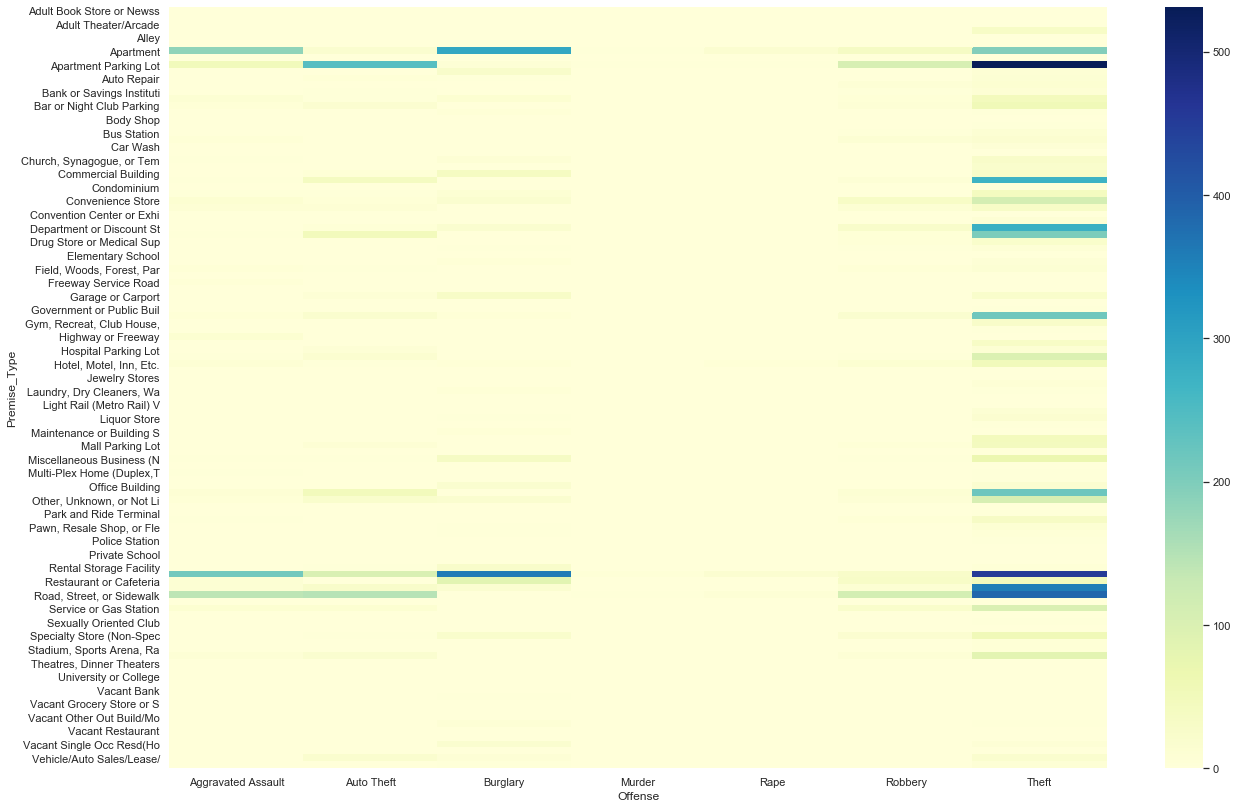

In [32]:
ax1=pd.crosstab(Hou_crime['Premise_Type'],Hou_crime['Offense'])
ax1
sns.set(rc={'figure.figsize':(21,14)})
sns.heatmap(ax1,cmap='YlGnBu')

## Q8.
Create a stacked column chart based on HPD_Division and Offenses (different types)

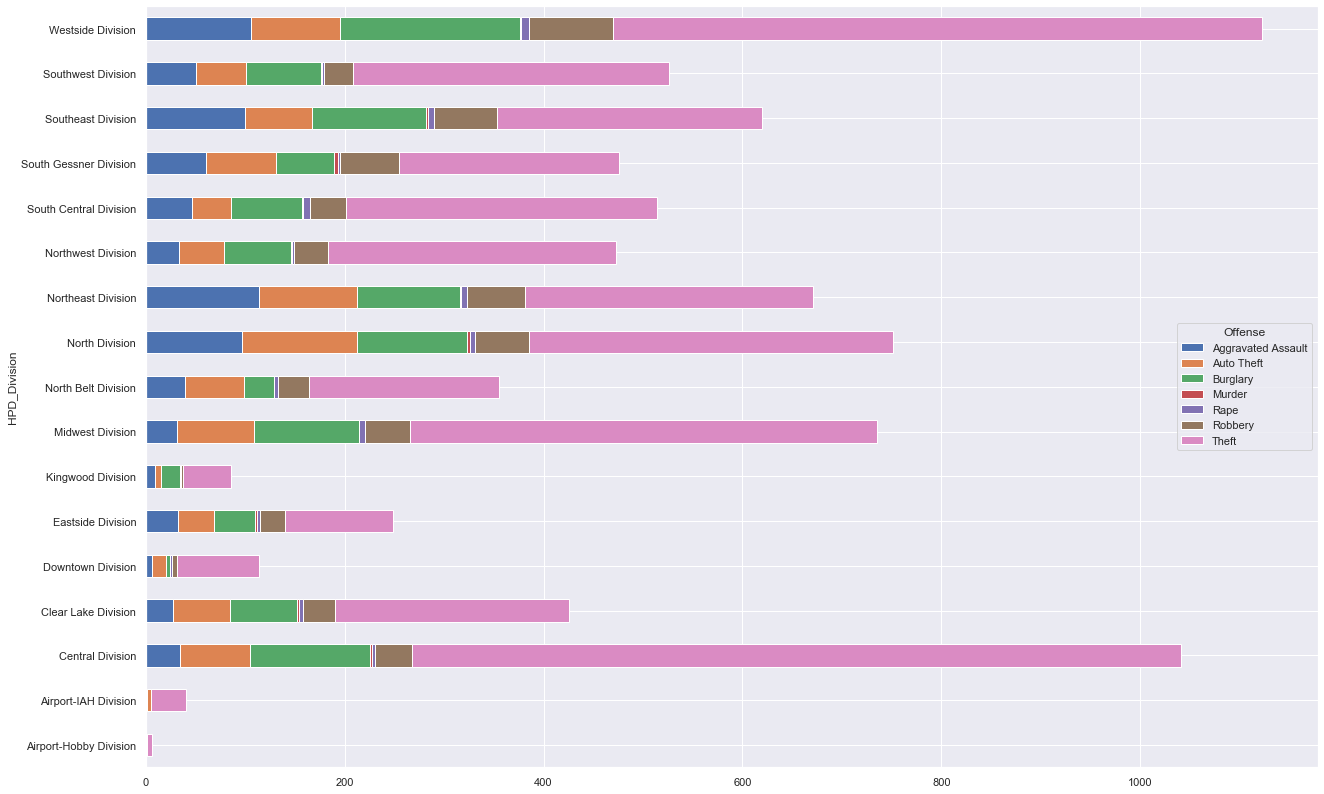

In [34]:
diff_type=pd.crosstab(Hou_crime['HPD_Division'],Hou_crime['Offense'])
diff_type.plot.barh(stacked=True)